# Aufgabe: kNN und Data Preprocessing

### Aufgabe 1. kNN

Nutzen Sie kNN von scikit-learn (KNeighborsRegressor), um damit den Benzinverbrauch eines Fahrzeugs auf Grundlage seiner Eigenschaften (Gewicht, PS, ...) vorherzusagen. Nutzen Sie dafür den bereitgestellten Miles-per-Gallon Datensatz mpg.csv.

Messen Sie die Leistungsfähigkeit Ihres Modells mit einer passenden Metrik. Plotten Sie die Akkuranz in Abhängigkeit von k nearest Neighbours.

0. Imports

In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
import os

1. Lesen von Data und Train/Test split

In [3]:
# Datensatz einlesen und die ersten Zeilen anschauen
data = pd.read_csv(os.path.join("..", "..", "..", "data", "mpg.csv"))
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [4]:
# Train/Test Split
x_train, x_test, y_train, y_test = train_test_split(
    data.drop(["mpg"], axis=1), data["mpg"]
)

# Ausgabe der Feature und Instanzenanzahl
print("X Train: {}".format(x_train.shape))
print("Y Train: {}".format(y_train.shape))
print("X Test: {}".format(x_test.shape))
print("Y Test: {}".format(y_test.shape))


X Train: (298, 7)
Y Train: (298,)
X Test: (100, 7)
Y Test: (100,)


Trainieren des Modells für mehrere k-Werte:

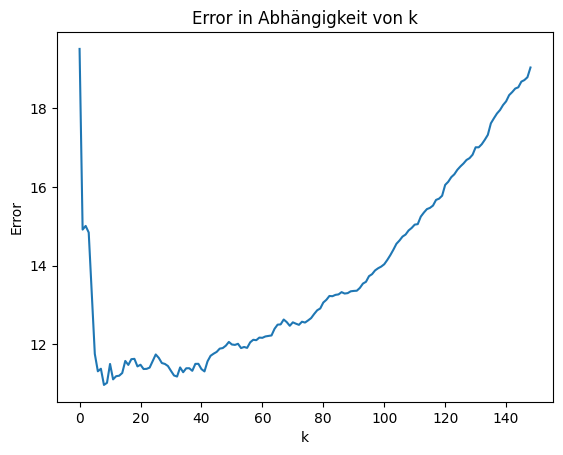

In [5]:
# Speicher die Fehler
error = []

# Probiere mögliche Anzahl Nachbarn durch
for i in range(1, 150):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    predicted = knn.predict(x_test)
    error.append(mse(predicted, y_test))

plt.title("Error in Abhängigkeit von k")
plt.plot(error)
plt.xlabel("k")
plt.ylabel("Error")
plt.show()

### Aufgabe 2. Preprocessing


1. Nutzen Sie die zur Verfügung stehenden Methoden zur Datenaufbereitung von scikit-learn, um den Censu Datensatz zu bereinigen:

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from tqdm import trange
from sklearn.metrics import accuracy_score

In [7]:
# Einlesen der Daten und Entfernen der Spalten
census = pd.read_csv(os.path.join("..", "..", "..", "data", "census.csv"))
census = census.drop(['occupation', 'relationship', 'capital-gain', 'capital-loss', 'native-country'], axis=1)
census.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,target
0,39,State-gov,Bachelors,Never-married,White,Male,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,White,Male,13,<=50K
2,38,Private,HS-grad,Divorced,White,Male,40,<=50K
3,53,Private,11th,Married-civ-spouse,Black,Male,40,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Black,Female,40,<=50K


Imputing fehlender Werte:

In [8]:
# Nachsehen ob echte NaN-Werte existieren
census.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
race              0
sex               0
hours-per-week    0
target            0
dtype: int64

In [9]:
# Untersuche weitere mögliche fehlende Werte
# es könnten auch '-', '?', '/' oder ähnliches in den Daten sein, wenn diese aus anderen Datenformaten stammen
for col in census.columns:
    print(census[col].unique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[40 13 16 45 50 80 30 35 60 20 52 44 15 25 38 43 55 48 58 32 70  2 22 56
 41 28 36 24 46 42 12 65  1 10 34 75 98 33 54  8  6 64 19 18 72  5  9 47
 37 21 26 14  4 59  7 99 53 39 62 57 78 90 66 11 49 84  3 17 68 27 85 31
 51 77 63 23 87 88 73 89 9

In [10]:
# Es sind viele Lehrzeichen in den String Objekten, das macht es schwieriger
# strip() entfernt alle Leerzeichen am Anfang oder Ende
for col in census.select_dtypes(include="object"):
    census[col] = census[col].str.strip()

col_missing = [col for col in census.columns if "?" in census[col].values]

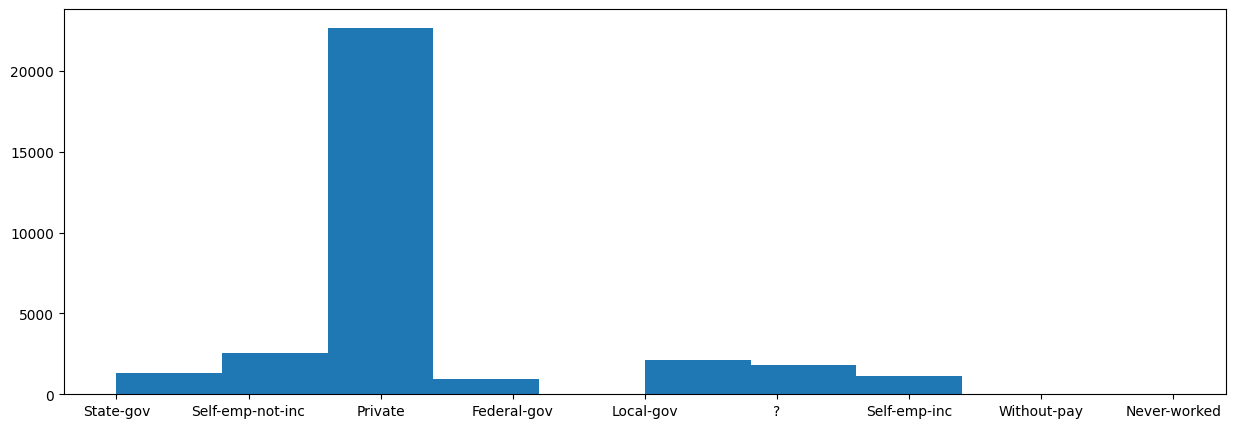

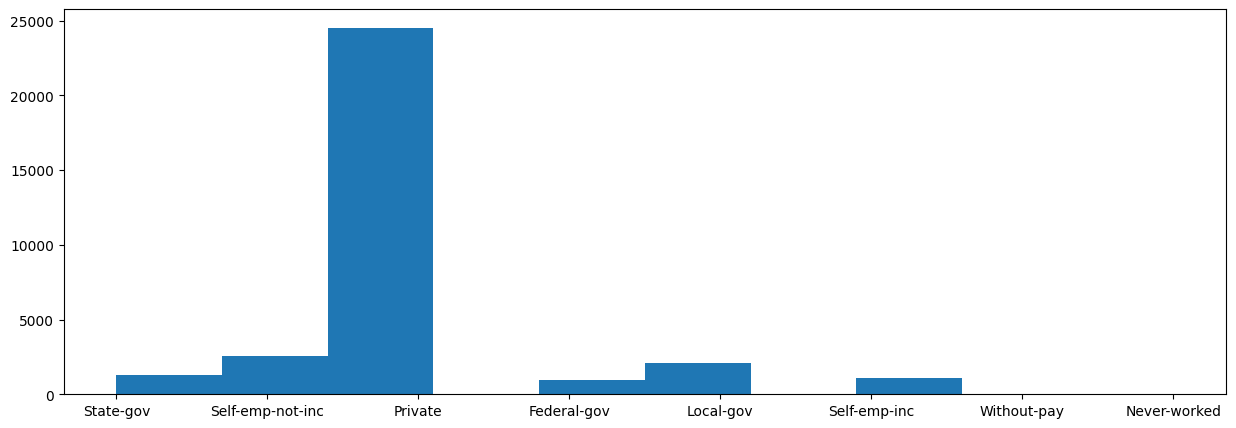

In [ ]:
# Es gibt 1 Feature mit missing Values: 'workclass': 1836 Instanzen

# Histogramm für die Spalte aus col_missing: workclass
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.hist(census[col_missing[0]])

# Definiere einen Imputer für die fehlenden Werte
imp_most_frequent = SimpleImputer(missing_values='?', strategy='most_frequent')

# Fit und transformiere die Spalte
# Die fit_transform Funktion des Imputers erwartet ein 2D-array, aber die Spalte muss 1D sein
# Deshalb die doppelte reshape Funktion
census[col_missing[0]] = imp_most_frequent.fit_transform(
    census[col_missing[0]].to_numpy().reshape(-1, 1)
).reshape(census.shape[0])

# Darstellung des Histogramms nach der Imputation
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.hist(census[col_missing[0]])
plt.show()

Encoding kategorischer Werte:

In [ ]:
# Die binären Features sex und target können per Hand encoded werden:
# SEX: Male: 1, Female: 0
census["sex"] = census["sex"].replace({'Male': 1, 'Female': 0})

# TARGET: >50K: 1, <=50K: 0
census["target"] = census["target"].replace({'>50K': 1, '<=50K': 0})

# Alle kategorischen Variablen sollten in diesem Fall encoded werden
to_encode = ['workclass', 'education', 'marital-status', 'race']
for feature in to_encode:
    # Benutze dummy codierung von pandas
    one_hot = pd.get_dummies(census[feature], drop_first=True)
    census = census.join(one_hot)
    census.pop(feature)

# Nachsehen wie viele Feature die Dummykodierung ergibt
census.shape

/var/folders/6z/jr7vc1n52qlbyvvf98jx_y580000gn/T/ipykernel_85252/1548752878.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  census["sex"] = census["sex"].replace({'Male': 1, 'Female': 0})
/var/folders/6z/jr7vc1n52qlbyvvf98jx_y580000gn/T/ipykernel_85252/1548752878.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  census["target"] = census["target"].replace({'>50K': 1, '<=50K': 0})


(32561, 36)

Normalisierung

In [13]:
# Vorerst muss train/test Split gemacht werden

x_train, x_test, y_train, y_test = train_test_split(census.drop(["target"],axis=1), census["target"])
print('X Train: {}'.format(x_train.shape))
print('Y Train: {}'.format(y_train.shape))
print('X Test: {}'.format(x_test.shape))
print('Y Test: {}'.format(y_test.shape))

X Train: (24420, 35)
Y Train: (24420,)
X Test: (8141, 35)
Y Test: (8141,)


In [ ]:
# Age und hours-per-week sollten normalisiert werden
scaled_columns = ['age', 'hours-per-week']

# Initalisieren des Scalers
minmax = MinMaxScaler()

# Fitte den Scaler auf die Trainingsdaten und wende ihn an
x_train[scaled_columns] = minmax.fit_transform(x_train[scaled_columns])
print(x_train.head())

# Wende denselben gefitetten Scaler auf die Testdaten an
x_test[scaled_columns] = minmax.transform(x_test[scaled_columns])
x_test.head()

            age  sex  hours-per-week  Local-gov  Never-worked  Private  \
22119  0.041096    0        0.193878      False         False    False   
1160   0.369863    1        0.397959      False         False     True   
12879  0.246575    1        0.397959      False         False    False   
23636  0.726027    1        0.030612      False         False     True   
16605  0.383562    1        0.091837      False         False    False   

       Self-emp-inc  Self-emp-not-inc  State-gov  Without-pay  ...  \
22119         False             False       True        False  ...   
1160          False             False      False        False  ...   
12879         False             False      False        False  ...   
23636         False             False      False        False  ...   
16605         False              True      False        False  ...   

       Married-AF-spouse  Married-civ-spouse  Married-spouse-absent  \
22119              False               False                  F

,age,sex,hours-per-week,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,...,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Asian-Pac-Islander,Black,Other,White
18127,0.260274,1,0.397959,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
20726,0.123288,0,0.142857,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
614,0.136986,0,0.193878,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
197,0.315068,0,0.551020,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
12724,0.164384,1,0.397959,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True


### 2. Predict with kNN
Sagen Sie den Einkommen >=50K oder <50K mittels kNN vorher. Plotten Sie die Akkuranz in Abhängigkeit von k nearest Neighbours. Bei längerer Rechenzeit (bei viele Iterationen) ist Prozessbar (trange (from tqdm.notebook import trange, tqdm) statt range) zu empfehlen. 

  0%|          | 0/19 [00:00<?, ?it/s]

100%|██████████| 19/19 [00:04<00:00,  3.90it/s]


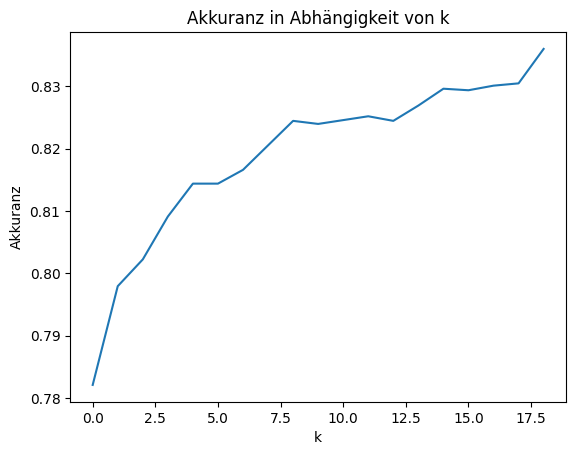

In [ ]:
# Speichern der Scores
scores = []

# Gehe durch die mögliche Anzahl der Nachbarn, trange zeigt wie viel Prozent des Loops geschafft sind
for i in trange(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)

    # Fit auf den Trainingsdaten und Vorhersage auf den Testdaten
    knn.fit(x_train, y_train)
    predicted = knn.predict(x_test)

    # Accuracy aus den Vorhersagen und den echten Werten
    scores.append(accuracy_score(predicted.reshape(-1,1), y_test.to_numpy().reshape(-1,1)))

plt.title("Akkuranz in Abhängigkeit von k")
plt.plot(scores)
plt.xlabel("k")
plt.ylabel("Akkuranz")
plt.show()

100%|██████████| 100/100 [03:58<00:00,  2.38s/it]


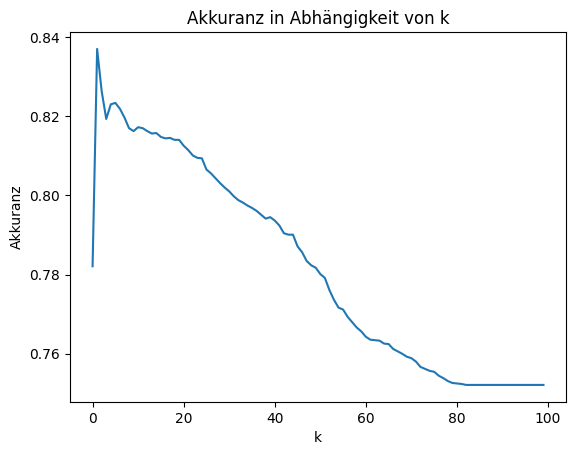

In [16]:
# Nochmal für andere Nachbarwerte
scores = []
for i in trange(1, 10000, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predicted = knn.predict(x_test)
    scores.append(accuracy_score(predicted.reshape(-1,1), y_test.to_numpy().reshape(-1,1)))

plt.title("Akkuranz in Abhängigkeit von k")
plt.plot(scores)
plt.xlabel("k")
plt.ylabel("Akkuranz")
plt.show()